# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Creamos un csv con el dataframe final: 
dataset = pd.read_csv("/content/drive/My Drive/DiploDatos - FAMAF - Entregables/Introducción al Aprendizaje Automático/loan_data.csv", comment = "#")

Mounted at /content/drive


In [ ]:
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [ ]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos contiene información sobre el desempeño de 5,960 prestamos otorgados con garantia hipotecaria. 

2. La variable objetivo a predecir `TARGET` contiene un 1 si el cliente incumplió el prestamo o 0 si lo pago. 

3. Los atributos que contiene el dataset son 10 y consisten en: 
* `LOAN`: cantidad solicitada en prestamo. 
* `MORTDUE`: Monto adeudado por hipoteca existente. 
* `VALUE`: valor actual de la propiedad. 
* `YOJ`: años en el trabajo actual. 
* `DEROG`: numero de informes negativos. 
* `DELINQ`: numero de lineas de credito morosas. 
* `CLAGE`: edad (en meses) de la linea de credito mas antigua. 
* `NINQ`: numero de consultas de creditos reciente. 
* `CLNO`: numero de lineas de credito. 
* `DEBTINC`: relación deuda-ingreso. 

4. Imaginamos que la relación deuda ingreso es una variable importante asi como la capacidad que tiene de generar un flujo de ingresos constante para afrontar los pagos del prestamo, reflejado en variables tales como: la cantidad de años en el trabajo (YOJ) y la antiguedad de su linea de credito (CLAGE). A su vez, la cantidad de informes negativos que tiene el aplicante (DEROG) tambien podria ser importante. 

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Entrenamos 
clf_sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=0))
clf_sgd.fit(X_train, y_train) 

y_train_pred_sgd = clf_sgd.predict(X = X_train)
y_test_pred_sgd = clf_sgd.predict(X = X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train 
accuracy_train_sgd = accuracy_score(y_train, y_train_pred_sgd)
precision_train_sgd = precision_score(y_train, y_train_pred_sgd)
recall_train_sgd = recall_score(y_train, y_train_pred_sgd)
f1_train_sgd = f1_score(y_train, y_train_pred_sgd)
conf_train_sgd = confusion_matrix(y_train, y_train_pred_sgd)

print("Accuracy sobre Train: ", accuracy_train_sgd)
print("Precision sobre Train: ", precision_train_sgd)
print("Recall sobre Train: ", recall_train_sgd)
print("F1 Score sobre Train: ", f1_train_sgd)
print("Confusion Matrix sobre Train:\n ", conf_train_sgd)

# Test
accuracy_test_sgd = accuracy_score(y_test, y_test_pred_sgd)
precision_test_sgd = precision_score(y_test, y_test_pred_sgd)
recall_test_sgd = recall_score(y_test, y_test_pred_sgd)
f1_test_sgd = f1_score(y_test, y_test_pred_sgd)
conf_test_sgd = confusion_matrix(y_test, y_test_pred_sgd)

print("Accuracy sobre Test: ", accuracy_test_sgd)
print("Precision sobre Test: ", precision_test_sgd)
print("Recall sobre Test: ", recall_test_sgd)
print("F1 Score sobre Test: ", f1_test_sgd)
print("Confusion Matrix sobre Test:\n ", conf_test_sgd)

Accuracy sobre Train:  0.8732299393122049
Precision sobre Train:  0.7142857142857143
Recall sobre Train:  0.41832669322709165
F1 Score sobre Train:  0.5276381909547739
Confusion Matrix sobre Train:
  [[1190   42]
 [ 146  105]]
Accuracy sobre Test:  0.8679245283018868
Precision sobre Test:  0.6451612903225806
Recall sobre Test:  0.3448275862068966
F1 Score sobre Test:  0.44943820224719105
Confusion Matrix sobre Test:
  [[302  11]
 [ 38  20]]


La matriz de confusion nos indica en la primera fila la cantidad de personas que no inclumplieron el prestamo y en la segunda fila la cantidad que si lo hizo. Mientras que en las columnas tenemos lo que el modelo predijo. Entonces, de 313 personas que pagaron su prestamo (target = 0), el modelo predijo 302 de manera correcta, y de 58 personas que incumplieron su prestamo (target = 1), el modelo predijo que 20 son incumplidores (pero que 38 no lo eran, cuando en realidad si). A partir de esta matriz es posible calcular las demas metricas del enunciado (aqui las obtuvimos directamente de la libreria sklearn). 

El modelo `Stochastic Gradient Descent (SGD)` tiene un buen accuracy sobre test ya que clasifica correctamente el 86.7% de los datos. Sin embargo, cuando se tienen dataset desbalanceados como es el caso, esta metrica no es la mas apropiada. De hecho, no clasifica muy bien a los clientes morosos. 

Mas conveniente en este caso es mirar la metrica de Precision y/o Recall. La Precision sobre test indica que un 64% de los clientes que el modelo clasifique como incumplidores o morosos, realmente lo seran. Pero dicha información debe ser complementada con la metrica Recall ya que nos informa que el modelo es capaz de identificar un 34.4% de clientes morososos, valor bastante menor que la metrica de Precision. Pero para tener una noción de ambas, es necesario mirar el F1 Score que se calcula como el promedio entre Precision y Recall, el cual nos da un valor de 44%. 

En conclusión, nuestro modelo base no clasifica muy bien a los clientes morosos. 


### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

clf_sgd_tun = SGDClassifier(class_weight = "balanced", random_state=0)
grilla = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],  
          'alpha': [10, 1.0, 0.07, 0.05, 0.01, 0.001], # mayor su valor, mayor la regularizacion
          'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
          'eta0': [1e-1, 1e-5]}

clf_sgd_tun = GridSearchCV(clf_sgd_tun, grilla, cv = 5, scoring='accuracy')
clf_sgd_tun.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=0,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [10, 1.0, 0.07, 0.05, 0.01, 0.001],
                         'eta0': [0.1, 1e-05],
                         'learning_rate': ['constant

In [ ]:
results = clf_sgd_tun.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_alpha', 'param_learning_rate', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values("rank_test_score")

,param_loss,param_alpha,param_learning_rate,mean_test_score,std_test_score,rank_test_score
0,hinge,10,constant,0.830749,0.001259,1
3,squared_hinge,10,constant,0.699436,0.263859,2
1,log,10,constant,0.698316,0.264702,3
2,modified_huber,10,constant,0.698316,0.264702,3
119,perceptron,0.07,adaptive,0.696965,0.264045,5
...,...,...,...,...,...,...
233,squared_hinge,0.001,invscaling,0.170598,0.004474,236
230,hinge,0.001,invscaling,0.170598,0.004474,236
108,squared_hinge,0.07,optimal,0.169924,0.001478,238
88,squared_hinge,0.07,optimal,0.169924,0.001478,238


In [ ]:
print("Mejores parametros: "+str(clf_sgd_tun.best_params_))
print("Mejor Score: "+str(clf_sgd_tun.best_score_)+'\n')

Mejores parametros: {'alpha': 10, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'hinge'}
Mejor Score: 0.8307489307489307



El modelo que arroja el mejor resultado (mejor score o accuracy) es aquel que toma como hiperparametro una tasa de regularización de 10, una tasa de aprendizaje constante y la función de perdida de tipo Hinge. Este modelo clasifica correctamente el 83% de los datos. 

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Siguiendo la documentación, se recomienda balancear el dataset para aplicar este modelo ya que se puede generar un sesgo hacia la clase dominante. En este caso, se utiliza el parametro `class_weight`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=0, class_weight = "balanced")
clf_tree.fit(X_train, y_train) 

y_train_pred_tree = clf_tree.predict(X = X_train)
y_test_pred_tree = clf_tree.predict(X = X_test)

In [ ]:
# Train 
accuracy_train_sgd = accuracy_score(y_train, y_train_pred_tree)
precision_train_sgd = precision_score(y_train, y_train_pred_tree)
recall_train_sgd = recall_score(y_train, y_train_pred_tree)
f1_train_sgd = f1_score(y_train, y_train_pred_tree)
conf_train_sgd = confusion_matrix(y_train, y_train_pred_tree)

print("Accuracy sobre Train: ", accuracy_train_sgd)
print("Precision sobre Train: ", precision_train_sgd)
print("Recall sobre Train: ", recall_train_sgd)
print("F1 Score sobre Train: ", f1_train_sgd)
print("Confusion Matrix sobre Train:\n ", conf_train_sgd)

# Test
accuracy_test_sgd = accuracy_score(y_test, y_test_pred_tree)
precision_test_sgd = precision_score(y_test, y_test_pred_tree)
recall_test_sgd = recall_score(y_test, y_test_pred_tree)
f1_test_sgd = f1_score(y_test, y_test_pred_tree)
conf_test_sgd = confusion_matrix(y_test, y_test_pred_tree)

print("Accuracy sobre Test: ", accuracy_test_sgd)
print("Precision sobre Test: ", precision_test_sgd)
print("Recall sobre Test: ", recall_test_sgd)
print("F1 Score sobre Test: ", f1_test_sgd)
print("Confusion Matrix sobre Test:\n ", conf_test_sgd)

Accuracy sobre Train:  1.0
Precision sobre Train:  1.0
Recall sobre Train:  1.0
F1 Score sobre Train:  1.0
Confusion Matrix sobre Train:
  [[1232    0]
 [   0  251]]
Accuracy sobre Test:  0.8652291105121294
Precision sobre Test:  0.5666666666666667
Recall sobre Test:  0.5862068965517241
F1 Score sobre Test:  0.576271186440678
Confusion Matrix sobre Test:
  [[287  26]
 [ 24  34]]


El modelo genera overfitting sobre el conjunto de train ya que clasifica correctamente el 100% de los casos. Sin embargo, no se observa que en el conjunto de test genere un sobreajuste, alcanzando un accuracy del 86%. En cuanto a precision y recall, se obtiene un valor bastante menor, por lo que se observa el mismo fenomeno que sobre el modelo anterior, no se esta clasificando muy bien a los clientes morosos. 

Que el modelo sobre train este sobreajustado se visualiza en la grafica siguiente, en la cual, el arbol se amplio lo suficiente como para clasificar correctamente a todos los datos. 

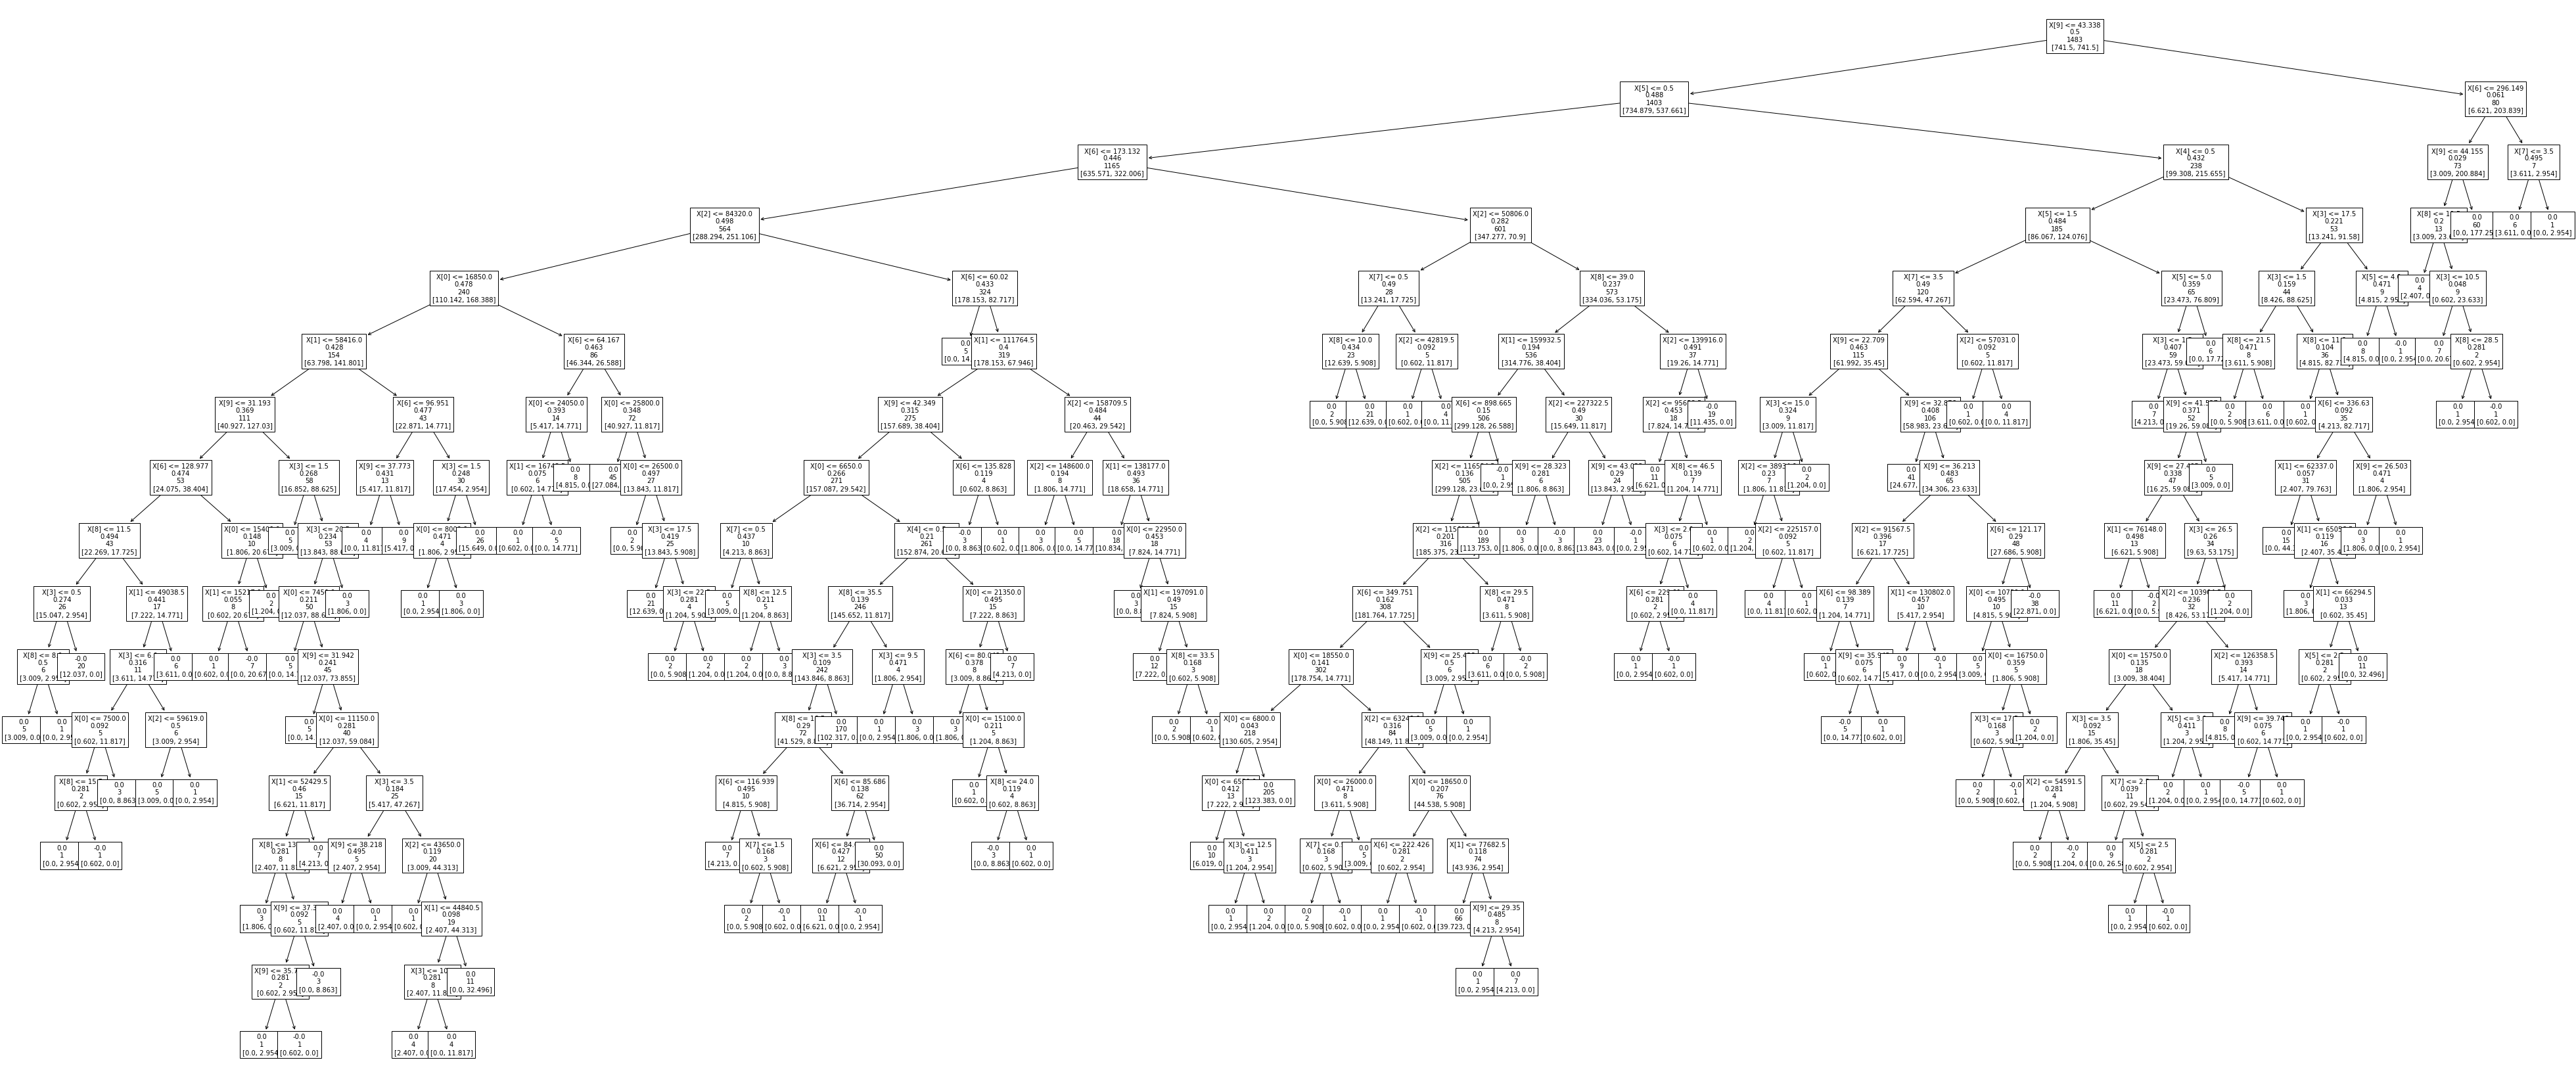

In [ ]:
from sklearn import tree
plt.figure(figsize=(70,30))  # set plot size (denoted in inches)
tree.plot_tree(clf_tree, fontsize=10, label = "None")
plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
clf_tree_tun = DecisionTreeClassifier(random_state=0, class_weight = "balanced")
grilla = {'criterion': ['gini', 'entropy'],  
          'max_depth': [3, 5, 10, 15], 
          'min_samples_leaf': [1, 3, 5, 7, 9]} # Por recomendación de la documentación la mejor opcion es comenzar con 1

clf_tree_tun = GridSearchCV(clf_tree_tun, grilla, cv = 5, scoring='accuracy')
clf_tree_tun.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
results = clf_tree_tun.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values("rank_test_score")

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
35,entropy,15,1,0.853683,0.020041,1
15,gini,15,1,0.847623,0.026120,2
10,gini,10,1,0.839537,0.034707,3
36,entropy,15,3,0.831416,0.029309,4
24,entropy,3,9,0.824652,0.026119,5
0,gini,3,1,0.823972,0.029618,6
23,entropy,3,7,0.823301,0.027795,7
22,entropy,3,5,0.823301,0.027795,7
1,gini,3,3,0.823298,0.028694,9
2,gini,3,5,0.822625,0.028048,10


In [ ]:
print("Mejores parametros: "+str(clf_tree_tun.best_params_))
print("Mejor Score: "+str(clf_tree_tun.best_score_)+'\n')

Mejores parametros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1}
Mejor Score: 0.8536832286832287



El modelo que arroja el mejor resultado (mejor score o accuracy) es aquel que toma como hiperparametro a entropy como criterion (funcion que mide la calidad de la division), una profundidad de arbol de 15 y la minima cantidad de muestra en las hojas de 1.Este modelo clasifica correctamente el 85% de los datos. 